In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('./data')

In [5]:
img = cv2.imread('imageSeg.jpg')
# convert to RGB for matplotlib imShow
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
img.shape

(406, 612, 3)

In [6]:
# the image has a high resolution and it will take time for processing so i will make it 2d then make it 3d after processing
img_2D = img.reshape((-1,3))
# convert to float32
img_2D = np.float32(img_2D) # k_means_clustering work with float32

img_2D.shape

(248472, 3)

In [7]:
'''
cv2.TERM_CRITERIA_EPS:
    Stop the algorithm when the desired accuracy or precision (epsilon) is reached.

cv2.TERM_CRITERIA_MAX_ITER:
    Stop the algorithm after a specified maximum number of iterations.

Combination (+):
    The combination of TERM_CRITERIA_EPS and TERM_CRITERIA_MAX_ITER means the algorithm will stop when either condition is met:
        Desired accuracy is achieved.
        The maximum number of iterations is reached.

Second Parameter (100):
    The maximum number of iterations the algorithm will perform.

Third Parameter (1.0):
    The desired precision (epsilon) for convergence.
'''

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

In [8]:
k = 3 # manual
'''
attempts:
    the algorithm take 3 random centers
    if the centers are not good, the algorithm will try again with new random centers
    attempts is the number of times the algorithm will try to find good centers
'''
_,labels,(centers) = cv2.kmeans(img_2D,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) # img, k, bestLabels, criteria, attempts, flags

In [9]:
# convert back to 8 bits
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [12]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels]

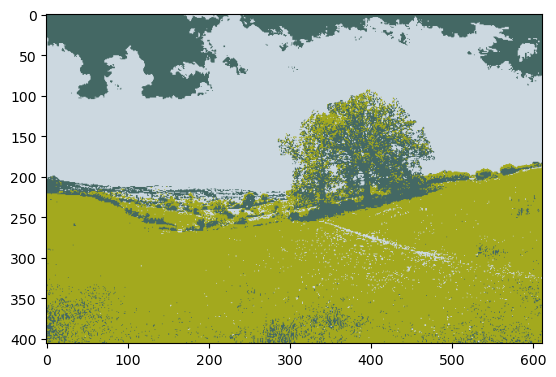

In [14]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image)
plt.show()

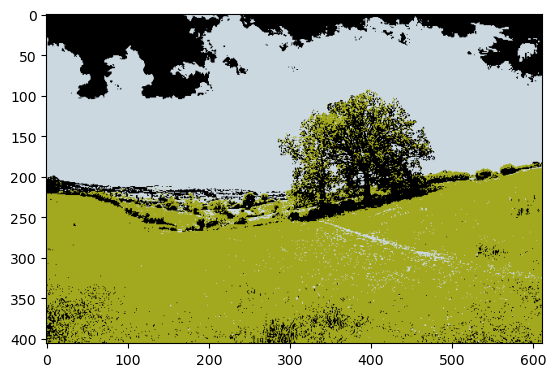

In [22]:
# remove cluster
copy_segmented_image = np.copy(segmented_image)
copy_segmented_image = copy_segmented_image.reshape((-1,3))

cluster = 0
copy_segmented_image[labels == cluster] = [0,0,0]
copy_segmented_image = copy_segmented_image.reshape(segmented_image.shape)
plt.imshow(copy_segmented_image)
plt.show()